<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(3_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.2'

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n250.csv')

In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,60.642946,38.645187,-366.267506,-256.979374,170.778078,-427.757451
1,0.0,1.0,80.906985,82.546608,1308.443320,1481.896913,378.523655,1103.373258
2,0.0,2.0,77.013346,50.851977,210.789448,348.654772,260.437699,88.217072
3,0.0,3.0,60.916779,59.656635,76.240198,206.813612,242.206148,-35.392536
4,0.0,4.0,46.067163,33.090752,-78.378557,10.779358,108.807159,-98.027801
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,56.741450,69.805464,-833.934488,-697.387575,182.893278,-880.280852
249996,999.0,246.0,64.135818,31.246897,-134.236109,-28.853394,106.899923,-135.753317
249997,999.0,247.0,78.371804,79.817647,152.054490,320.243940,148.228496,172.015444
249998,999.0,248.0,46.503093,81.975453,493.711197,632.189743,225.136647,407.053095


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    60.642946  38.645187  -366.267506  -256.979374  170.778078   
      1.0    80.906985  82.546608  1308.443320  1481.896913  378.523655   
      2.0    77.013346  50.851977   210.789448   348.654772  260.437699   
      3.0    60.916779  59.656635    76.240198   206.813612  242.206148   
      4.0    46.067163  33.090752   -78.378557    10.779358  108.807159   
...                ...        ...          ...          ...         ...   
999.0 245.0  56.741450  69.805464  -833.934488  -697.387575  182.893278   
      246.0  64.135818  31.246897  -134.236109   -28.853394  106.899923   
      247.0  78.371804  79.817647   152.054490   320.243940  148.228496   
      248.0  46.503093  81.975453   493.711197   632.189743  225.136647   
      249.0  81.029402  23.656168  -150.327572   -35.642002   56.280774   

                   e_hat  
rep   index               
0.0   0.0    -427.757451  
      1.0    1103.373258  
      2.0      88.217072  
      3.0     -35.392536  
      4.0     -98.027801  
...                  ...  
999.0 245.0  -880.280852  
      246.0  -135.753317  
      247.0   172.015444  
      248.0   407.053095  
      249.0   -91.922776  

[250000 rows x 6 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    60.642946  38.645187  -366.267506  -256.979374  170.778078   
      1.0    80.906985  82.546608  1308.443320  1481.896913  378.523655   
      2.0    77.013346  50.851977   210.789448   348.654772  260.437699   
      3.0    60.916779  59.656635    76.240198   206.813612  242.206148   
      4.0    46.067163  33.090752   -78.378557    10.779358  108.807159   
...                ...        ...          ...          ...         ...   
999.0 245.0  56.741450  69.805464  -833.934488  -697.387575  182.893278   
      246.0  64.135818  31.246897  -134.236109   -28.853394  106.899923   
      247.0  78.371804  79.817647   152.054490   320.243940  148.228496   
      248.0  46.503093  81.975453   493.711197   632.189743  225.136647   
      249.0  81.029402  23.656168  -150.327572   -35.642002   56.280774   

                   e_hat  
rep   index               
0.0   0.0    -427.757451  
      1.0    1103.373258  
      2.0      88.217072  
      3.0     -35.392536  
      4.0     -98.027801  
...                  ...  
999.0 245.0  -880.280852  
      246.0  -135.753317  
      247.0   172.015444  
      248.0   407.053095  
      249.0   -91.922776  

[250000 rows x 6 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,60.642946,38.645187,-366.267506,-256.979374,170.778078,-427.757451
1,0.0,1.0,80.906985,82.546608,1308.443320,1481.896913,378.523655,1103.373258
2,0.0,2.0,77.013346,50.851977,210.789448,348.654772,260.437699,88.217072
3,0.0,3.0,60.916779,59.656635,76.240198,206.813612,242.206148,-35.392536
4,0.0,4.0,46.067163,33.090752,-78.378557,10.779358,108.807159,-98.027801
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,56.741450,69.805464,-833.934488,-697.387575,182.893278,-880.280852
249996,999.0,246.0,64.135818,31.246897,-134.236109,-28.853394,106.899923,-135.753317
249997,999.0,247.0,78.371804,79.817647,152.054490,320.243940,148.228496,172.015444
249998,999.0,248.0,46.503093,81.975453,493.711197,632.189743,225.136647,407.053095


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    60.642946  38.645187  -366.267506  -256.979374  170.778078   
      1.0    80.906985  82.546608  1308.443320  1481.896913  378.523655   
      2.0    77.013346  50.851977   210.789448   348.654772  260.437699   
      3.0    60.916779  59.656635    76.240198   206.813612  242.206148   
      4.0    46.067163  33.090752   -78.378557    10.779358  108.807159   
...                ...        ...          ...          ...         ...   
999.0 245.0  56.741450  69.805464  -833.934488  -697.387575  182.893278   
      246.0  64.135818  31.246897  -134.236109   -28.853394  106.899923   
      247.0  78.371804  79.817647   152.054490   320.243940  148.228496   
      248.0  46.503093  81.975453   493.711197   632.189743  225.136647   
      249.0  81.029402  23.656168  -150.327572   -35.642002   56.280774   

                   e_hat  
rep   index               
0.0   0.0    -427.757451  
      1.0    1103.373258  
      2.0      88.217072  
      3.0     -35.392536  
      4.0     -98.027801  
...                  ...  
999.0 245.0  -880.280852  
      246.0  -135.753317  
      247.0   172.015444  
      248.0   407.053095  
      249.0   -91.922776  

[250000 rows x 6 columns]

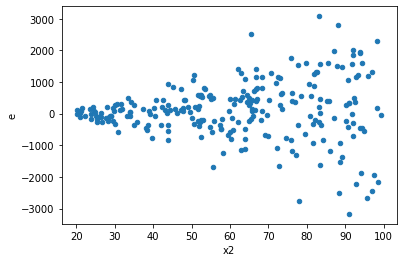

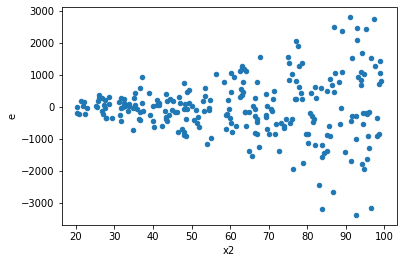

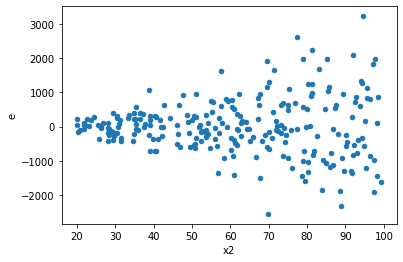

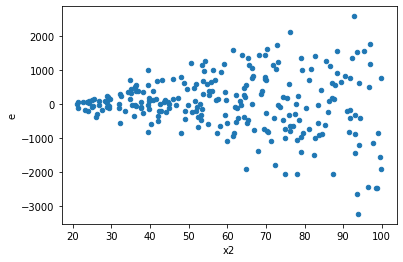

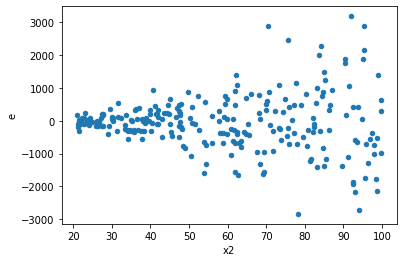

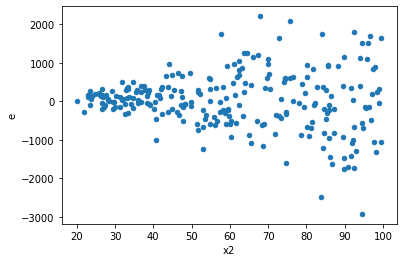

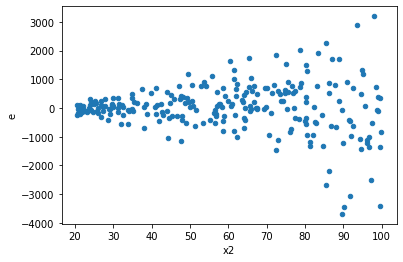

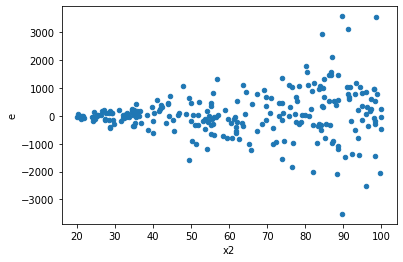

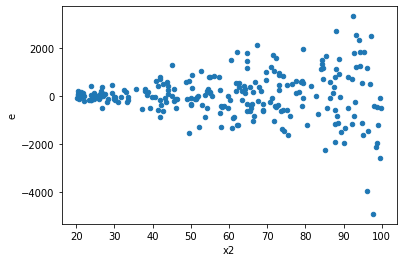

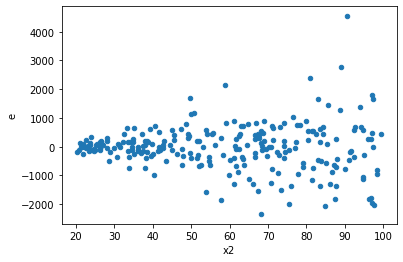

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,143.0,103.0,52585763.12161197,152398335.06398287,367732.6092420417,1479595.4860580862,4.023563450377108,1.4495071809506044e-12,0.9999999999992752,7.247535904753022e-13,Reject001=0 : Heteroscedasticity
4.0,111.0,135.0,60836606.55918286,116040165.77305584,548077.536569215,859556.7835041173,1.5683123758084665,0.0127008366238055,0.9936495816880972,0.00635041831190275,Reject001=1 : Homoscedasticity
6.0,128.0,118.0,61287982.922745705,125959375.99372132,478812.3665839508,1067452.3389298418,2.2293750400506496,1.3568960255394558e-05,0.9999932155198723,6.784480127697279e-06,Reject001=0 : Heteroscedasticity
7.0,122.0,124.0,19453175.804158367,151974688.41585463,159452.2606898227,1225602.3259343116,7.686327685992713,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
10.0,125.0,121.0,31670162.43236999,149573302.87661815,253361.2994589599,1236142.9989803152,4.878973235533743,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
11.0,127.0,119.0,31605778.677039873,185534655.7368278,248864.39903181003,1559114.75409099,6.264916798692861,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
12.0,117.0,129.0,21894585.701001734,198961166.83041722,187133.21111967292,1542334.6265923816,8.241907555394047,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
14.0,127.0,119.0,45999711.26178476,158836701.2027925,362202.45088019496,1334762.1949814495,3.68512745216886,4.0787373478679e-12,0.9999999999979606,2.03936867393395e-12,Reject001=0 : Heteroscedasticity
15.0,112.0,134.0,16725958.375056632,158886532.29586294,149338.91406300565,1185720.3902676338,7.939795181364329,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,143.0,103.0,52585763.12161197,152398335.06398287,367732.6092420417,1479595.4860580862,4.023563450377108,1.4495071809506044e-12,Reject001=0 : Heteroscedasticity
1.0,134.0,112.0,144376191.36371356,68276356.44905151,1077434.26390831,609610.32543796,0.5657981612972334,0.0016325700052527937,Reject001=0 : Heteroscedasticity
2.0,114.0,132.0,92622264.83459459,69750866.92771192,812476.0073210052,528415.6585432721,0.6503769388657131,0.01883705779233739,Reject001=1 : Homoscedasticity
3.0,121.0,125.0,147096844.0034839,28479676.47662015,1215676.3967230073,227837.4118129612,0.18741616800912037,1.9323096376029553e-18,Reject001=0 : Heteroscedasticity
4.0,111.0,135.0,60836606.55918286,116040165.77305584,548077.536569215,859556.7835041173,1.5683123758084665,0.0127008366238055,Reject001=1 : Homoscedasticity
5.0,114.0,132.0,105419134.64307739,25946372.499051053,924729.2512550649,196563.42802311404,0.2125632208090459,9.51298557527951e-16,Reject001=0 : Heteroscedasticity
6.0,128.0,118.0,61287982.922745705,125959375.99372132,478812.3665839508,1067452.3389298418,2.2293750400506496,1.3568960255394558e-05,Reject001=0 : Heteroscedasticity
7.0,122.0,124.0,19453175.804158367,151974688.41585463,159452.2606898227,1225602.3259343116,7.686327685992713,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,125.0,121.0,158995613.48293227,73600816.2250518,1271964.9078634582,608271.2084715025,0.4782138286293027,5.212558356720188e-05,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    792
Reject001=1 : Homoscedasticity      208
Name: Result_test, dtype: int64